# Zomato Data Analysis Project

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv(r"C:\Users\Milli\OneDrive\Desktop\All python Analysis\Zomato Data\Zomato data .csv")
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


# Converting The Data Type Of Columns -Rate

In [16]:
def handleRate(value):
    value =str(value).split('/')
    value =value[0];
    return float(value)

df['rate']=df['rate'].apply(handleRate)
print(df.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


# Type Of Resturant

In [18]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


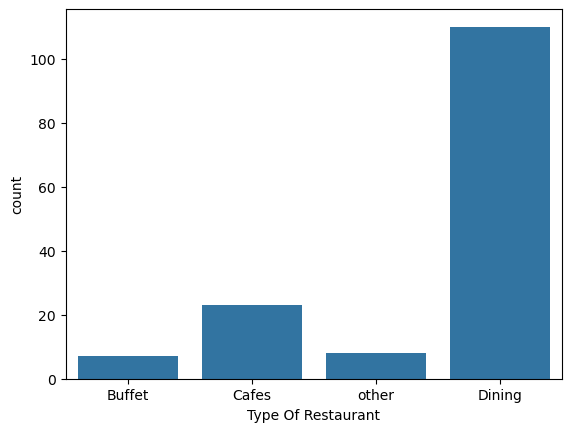

In [20]:
sns.countplot(x=df['listed_in(type)'])
plt.xlabel("Type Of Restaurant")
plt.show()

#### Conclusion -Majority if the Resturant fall in Dinning Category

In [22]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


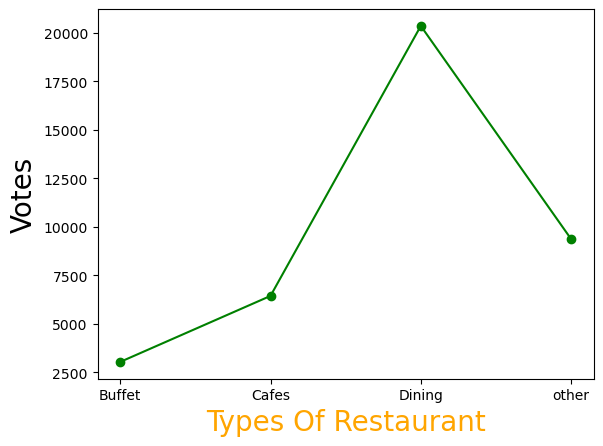

In [29]:
# Grouping the data and summing votes by 'listed_in(type)'
grouped_data = df.groupby('listed_in(type)')['votes'].sum()

# Creating a DataFrame from the grouped data
result = pd.DataFrame({"votes": grouped_data})

# Plotting the result
plt.plot(result.index, result['votes'], c='Green', marker="o")

# Setting the x and y labels with customized colors and font size
plt.xlabel("Types Of Restaurant", color="orange", size=20)
plt.ylabel("Votes", color="black", size=20)

# Display the plot
plt.show()


#### Conclusion:- Dinning Resturants has received Maximum Votes.

In [30]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


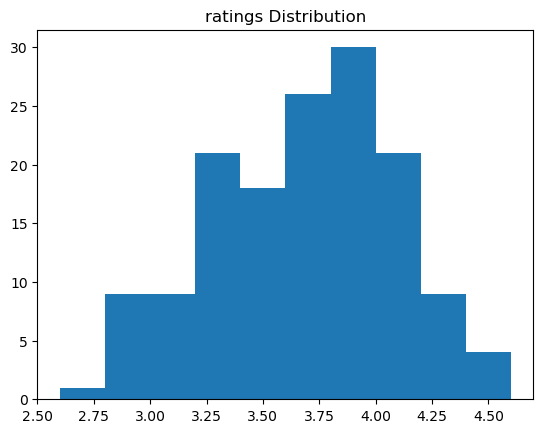

In [32]:
plt.hist(df['rate'],bins=10)
plt.title("ratings Distribution")
plt.show()

### Conclusion:- The Majority resturant received rating from 3.5 to 4

# Average Order spending By couples

In [33]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

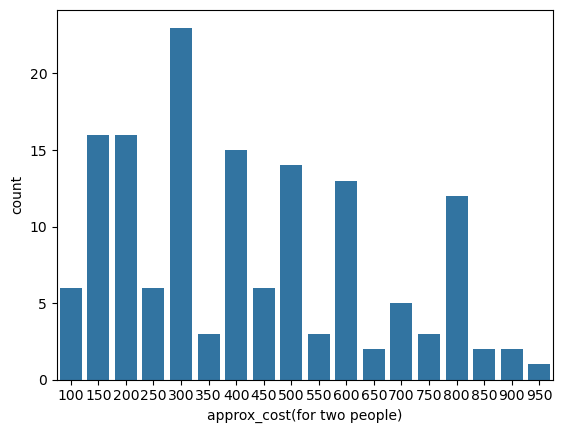

In [34]:
couple_data=df['approx_cost(for two people)']
sns.countplot(x=couple_data)

#### Conclusion:- The Majority of couples preferr resturant with an approximate cost of 300 RS

# Which mode receives Maximum Rating

In [35]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


<Axes: xlabel='online_order', ylabel='rate'>

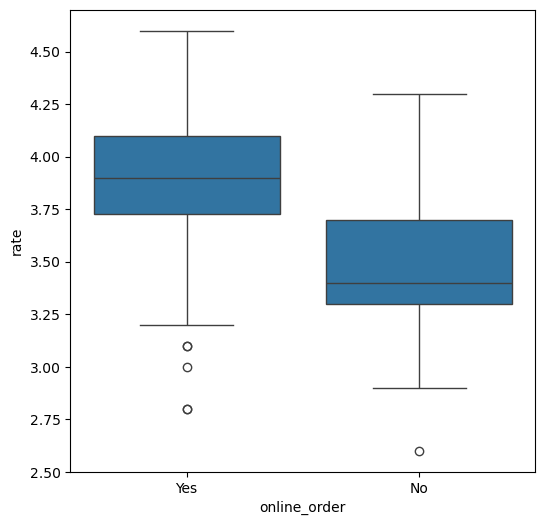

In [36]:
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order', y='rate',data=df)

#### Conclusion:- Offline order received lower Rating In Comparsion to Online Order

In [37]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


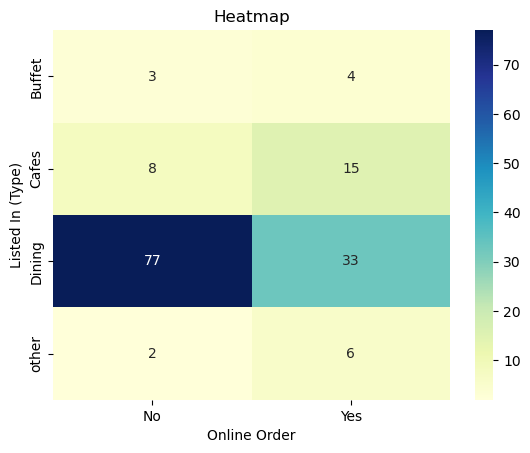

In [40]:
# Creating the pivot table
pivot_table = df.pivot_table(index='listed_in(type)', 
                             columns='online_order', 
                             aggfunc='size', 
                             fill_value=0)

# Plotting the heatmap
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt="d")

# Setting the title and labels
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Listed In (Type)")

# Display the plot
plt.show()


#### Conclusion:- dining Resturant Primarily accept ofline orders, whereas Cafes primarily Receive online Orders. 
#### This suggests that clientsprefers order in person at restaurants,but prefer Odering at Cafes.